<a href="https://colab.research.google.com/github/florencianionquepan/analisis_hidratos_offshore/blob/main/An%C3%A1lisis_de_Hidratos_en_L%C3%ADnea_de_Producci%C3%B3n_Offshore.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Introducci칩n

La formaci칩n de hidratos en l칤neas de producci칩n offshore es un problema cr칤tico en la industria del petr칩leo y gas. Estas estructuras cristalinas pueden generar bloqueos en las tuber칤as, afectando la continuidad operativa, aumentando costos de mantenimiento y representando riesgos para la seguridad. Los hidratos se forman bajo condiciones espec칤ficas de presi칩n y temperatura, por lo que su monitoreo y control son esenciales para evitar fallas en la producci칩n.

Este proyecto analiza la formaci칩n de hidratos en pozos petroleros utilizando el conjunto de datos 3W, que incluye instancias de eventos no deseados en pozos de petr칩leo, como la formaci칩n de hidratos. El dataset contiene informaci칩n de pozos marinos con flujo natural (no requieren energia adicional), y mide diversas variables de proceso que se monitorizan com칰nmente:

* Presi칩n en el PDG
* Presi칩n en el TPT
* Temperatura en el TPT
* Presi칩n aguas arriba del PCK
* Temperatura aguas abajo del PCK

Siendo:
* PDG (Permanent Downhole Gauge): Sensor ubicado en el fondo del pozo que mide la presi칩n.
* TPT (Temperature and Pressure Transducer): Es un dispositivo que contiene sensores de presi칩n y temperatura, y es parte del 치rbol de navidad submarino
* PCK (Production Choke): Es una v치lvula de control instalada al principio de la unidad de producci칩n y es responsable del control del pozo en la superficie

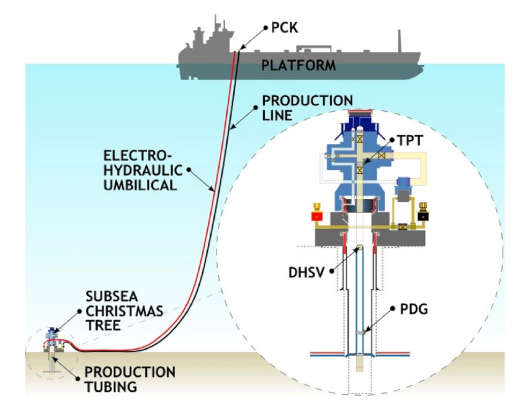


El an치lisis se centrar치 en el evento indeseable n칰mero 8, "Hidrato en la l칤nea de producci칩n". El conjunto de datos 3W incluye tanto datos reales como simulados, lo que proporciona una base rica para evaluar t칠cnicas de aprendizaje autom치tico para la detecci칩n temprana de fallos en ambientes hostiles.

En este trabajo, se analizar치n y visualizar치n las variables del dataset en histogramas para identificar outliers y se estudiar치n los cambios a lo largo del tiempo. Los datos se etiquetan en tres periodos, seg칰n el tipo de evento:

* Normal: No se detectan anomal칤as.
* Faulty Transient (Transitorio Defectuoso): El evento est치 en curso y a칰n no ha alcanzado su estado estable.
* Faulty Steady State (Estado Estable Defectuoso): El evento ya ha alcanzado un estado estable.
El etiquetado de los per칤odos transitorios defectuosos es crucial para la clasificaci칩n temprana de los eventos, ya que permite predecir la llegada del **Faulty Steady State**, proporcionando as칤 una alerta temprana para prevenir fallos.

Este conjunto de datos fue presentado en el art칤culo **Vargas et al. (2019)** y contiene instancias de ocho tipos de eventos indeseables caracterizados por ocho variables de proceso. El trabajo presenta tanto datos reales como simulados, lo que permite entrenar modelos para la detecci칩n temprana de fallos y gestionar estos eventos en ambientes hostiles.

### Referencia:
Vargas, R. E., Munaro, C. J., Ciarelli, P. M., Medeiros, A. G., Amaral, B. G., Barrionuevo, D. C., Ara칰jo, J. C. D., Ribeiro, J. L., Magalh칚es, L. P. (2019). A realistic and public dataset with rare undesirable real events in oil wells. *Journal of Petroleum Science and Engineering*, 181, 106223. [DOI: 10.1016/j.petrol.2019.106223](https://doi.org/10.1016/j.petrol.2019.106223).  
Enlace al art칤culo completo: [ScienceDirect](http://www.sciencedirect.com/science/article/pii/S0920410519306357).



# Carga del Data set

Se cargan los datos en archivos CSV para trabajar en principio con este formato. Actualmente, el repositorio de Petrobras muestra estos datos en archivos Parquet.

Los archivos Parquet son un formato de almacenamiento optimizado para Big Data, dise침ado para ser eficiente en almacenamiento y lectura. Su estructura columnar permite una mejor compresi칩n y acceso m치s r치pido a los datos en comparaci칩n con formatos como CSV o JSON, adem치s de ser compatible con herramientas como Apache Spark, Hadoop y Pandas.

Sin embargo, en este trabajo del curso, se utilizan archivos CSV inicialmente para simplificar el procesamiento y manipulaci칩n de datos, ya que es un formato m치s accesible y f치cil de manejar sin requerir configuraciones avanzadas o herramientas adicionales.


Desde aqui se dsecomprimio el zip subido:

In [62]:
%reset -f #reseteo de variables
!cp /content/drive/MyDrive/DataScience/Entrega1/8.zip /content/dataset.zip

Don't know how to reset  #reseteo, please run `%reset?` for details
Don't know how to reset  de, please run `%reset?` for details
Don't know how to reset  variables, please run `%reset?` for details


In [63]:
!unzip -o /content/dataset.zip -d /content/dataset/


Archive:  /content/dataset.zip
  inflating: /content/dataset/8/SIMULATED_00001.csv  
  inflating: /content/dataset/8/SIMULATED_00002.csv  
  inflating: /content/dataset/8/SIMULATED_00003.csv  
  inflating: /content/dataset/8/SIMULATED_00004.csv  
  inflating: /content/dataset/8/SIMULATED_00005.csv  
  inflating: /content/dataset/8/SIMULATED_00006.csv  
  inflating: /content/dataset/8/SIMULATED_00007.csv  
  inflating: /content/dataset/8/SIMULATED_00008.csv  
  inflating: /content/dataset/8/SIMULATED_00009.csv  
  inflating: /content/dataset/8/SIMULATED_00010.csv  
  inflating: /content/dataset/8/SIMULATED_00011.csv  
  inflating: /content/dataset/8/SIMULATED_00012.csv  
  inflating: /content/dataset/8/SIMULATED_00013.csv  
  inflating: /content/dataset/8/SIMULATED_00014.csv  
  inflating: /content/dataset/8/SIMULATED_00015.csv  
  inflating: /content/dataset/8/SIMULATED_00016.csv  
  inflating: /content/dataset/8/SIMULATED_00017.csv  
  inflating: /content/dataset/8/SIMULATED_00018.csv

Para familiarizarse con los datos a analizar, se cargar치n todos los archivos CSV en dataframes. Seg칰n la documentaci칩n revisada, todos los CSV contienen las mismas columnas y, de acuerdo con las reglas establecidas, deben ser considerados en conjunto para un an치lisis adecuado. En esta etapa, se verificar치 que todos los archivos mantengan la misma estructura y se describir치 el significado de cada columna.

In [64]:
import pandas as pd
import os
import re

data_path='/content/dataset/8'

dfs = {}  # Diccionario para almacenar los DataFrames

# Obtener todos los archivos CSV en la carpeta
files = [file for file in os.listdir(data_path) if file.endswith(".csv")]

# Separar los archivos en listas distintas
simulated_files = sorted(
    [file for file in files if file.startswith("SIMULATED")],
    key=lambda x: int(re.search(r'\d+', x).group())  # Extraer n칰mero y ordenar
)

well_files = sorted(
    [file for file in files if file.startswith("WELL") or file.startswith("WEL")],
    key=lambda x: int(re.search(r'\d+', x).group())  # Extraer n칰mero y ordenar
)

# Unir las listas con SIMULATED primero y WELL despu칠s
sorted_files = simulated_files + well_files

# Cargar los archivos en el diccionario ordenado
for file in sorted_files:
    file_path = os.path.join(data_path, file)
    df = pd.read_csv(file_path)
    dfs[file] = df  # Guardar el DataFrame con su nombre de archivo

print(f"Se cargaron {len(dfs)} archivos CSV.")

# Verificar el primer y 칰ltimo archivo en el diccionario
first_file = next(iter(dfs))
last_file = list(dfs.keys())[-1]

print(f"\n游늭 Primer archivo en el diccionario: {first_file}")
print(f"游늭 칔ltimo archivo en el diccionario: {last_file}")

for file, df in dfs.items():
    print(f"\n游늭 Archivo: {file}")
    print(df.columns.tolist())  # Lista de nombres de columnas
    print(df.dtypes)  # Verifica el tipo de datos de cada columna

Se cargaron 84 archivos CSV.

游늭 Primer archivo en el diccionario: SIMULATED_00001.csv
游늭 칔ltimo archivo en el diccionario: WELL-00021_20170509013517.csv

游늭 Archivo: SIMULATED_00001.csv
['timestamp', 'P-PDG', 'P-TPT', 'T-TPT', 'P-MON-CKP', 'T-JUS-CKP', 'P-JUS-CKGL', 'T-JUS-CKGL', 'QGL', 'class']
timestamp      object
P-PDG         float64
P-TPT         float64
T-TPT         float64
P-MON-CKP     float64
T-JUS-CKP     float64
P-JUS-CKGL    float64
T-JUS-CKGL    float64
QGL           float64
class           int64
dtype: object

游늭 Archivo: SIMULATED_00002.csv
['timestamp', 'P-PDG', 'P-TPT', 'T-TPT', 'P-MON-CKP', 'T-JUS-CKP', 'P-JUS-CKGL', 'T-JUS-CKGL', 'QGL', 'class']
timestamp      object
P-PDG         float64
P-TPT         float64
T-TPT         float64
P-MON-CKP     float64
T-JUS-CKP     float64
P-JUS-CKGL    float64
T-JUS-CKGL    float64
QGL           float64
class           int64
dtype: object

游늭 Archivo: SIMULATED_00003.csv
['timestamp', 'P-PDG', 'P-TPT', 'T-TPT', 'P-MON-CKP', 'T-

Como se puede ver, todos los csvs contienen los mismos nombres de columnas:


1. timestamp: Marca de tiempo que indica el momento exacto en que se registr칩 cada medici칩n. Est치 en formato "AAAA-MM-DD HH:MM:SS.ssssss" (a침o-mes-d칤a hora:minuto:segundo.milisegundos), lo que permite un an치lisis temporal preciso de los datos
2. P-PDG: Presi칩n del fluido en el PDG [Pa]
3. P-TPT: Presi칩n del fluido en el TPT [Pa]
4. T-TPT:  Temperatura del fluido en el TPT [C]
5. P-MON-CKP: Presi칩n del fluido antes de la v치lvula PCK, o lo que es lo mismo, presi칩n aguas arriba de la v치lvula PCK [Pa]
6. T-JUS-CKP: Temperatura del fluido despu칠s de la v치lvula o aguas abajo del PCK [C]
7. P-JUS-CKGL: Presi칩n del fluido despu칠s de la v치lvula de control de gas lift [Pa]
8. T-JUS-CKGL:  Temperatura del fluido despu칠s de la v치lvula de control de gas lift [C]
9. QGL: Caudal de gas lift [sm3/s]
10. class: Etiqueta que indica el estado del sistema en cada registro. Puede tomar diferentes valores, 0: Estado normal, sin anomalias. 3 y 103: eventos anomales detectados. De todas maneras, no se encontro aun ninguna referencia a estos codigos especificos.



# Exploraci칩n y visualizaci칩n (EDA): conociendo el data set

Dado que se cuenta con las mismas columnas en todos los archivos, se exploraran algunas filas y dimensiones de un archivo en especifico:

In [65]:
# Obtener la primera clave del diccionario (que es el nombre del archivo)
first_file = next(iter(dfs))

# Acceder al DataFrame correspondiente a ese archivo
df_1 = dfs[first_file]

print(f"\n游늭 Primer archivo en el diccionario: {first_file}")

# Primeras filas
print("\nPrimeras filas:")
print(df_1.head())

# 칔ltimas filas
print("\n칔ltimas filas:")
print(df_1.tail())

# Dimensiones del DataFrame
print("\nDimensiones (filas, columnas):")
print(df_1.shape)

# Informaci칩n general sobre el DataFrame
print("\nInformaci칩n general sobre el DataFrame:")
print(df_1.info())

# Columnas del DataFrame
print("\nColumnas del DataFrame:")
print(df_1.columns.tolist())


游늭 Primer archivo en el diccionario: SIMULATED_00001.csv

Primeras filas:
                    timestamp       P-PDG       P-TPT  T-TPT  P-MON-CKP  \
0  2018-05-17 22:56:06.000000 27897490.00 19824230.00 125.69 4059666.00   
1  2018-05-17 22:56:07.000000 27897450.00 19824230.00 125.69 4059666.00   
2  2018-05-17 22:56:08.000000 27897360.00 19824230.00 125.69 4059666.00   
3  2018-05-17 22:56:09.000000 27897430.00 19824230.00 125.69 4059666.00   
4  2018-05-17 22:56:10.000000 27897500.00 19824230.00 125.69 4059666.00   

   T-JUS-CKP  P-JUS-CKGL  T-JUS-CKGL  QGL  class  
0      97.55         NaN         NaN  NaN      0  
1      97.55         NaN         NaN  NaN      0  
2      97.55         NaN         NaN  NaN      0  
3      97.55         NaN         NaN  NaN      0  
4      97.55         NaN         NaN  NaN      0  

칔ltimas filas:
                        timestamp       P-PDG       P-TPT  T-TPT  P-MON-CKP  \
26994  2018-05-18 06:26:00.000000 33700360.00 28074090.00   3.41 4002707.

Las columnas P-JUS-CKGL, T-JUS-CKGL y QGL est치n asociadas al sistema de gas lift, el cual no est치 presente en los conjuntos de datos analizados (todas sus entradas son NaN). Adem치s, el gas lift no tiene un impacto directo en la formaci칩n de hidratos, ya que este fen칩meno est치 determinado principalmente por las condiciones de presi칩n y temperatura en el fondo del pozo, as칤 como por la ca칤da de presi칩n en el PCK. Dado que estas variables no aportan informaci칩n relevante para este an치lisis y su presencia solo introducir칤a datos faltantes, se justifica su eliminaci칩n del estudio.

In [66]:
for file, df in dfs.items():
    # Borrar las columnas relacionadas con gas lift
    columns_to_drop = ['P-JUS-CKGL', 'T-JUS-CKGL', 'QGL']
    df.drop(columns=[col for col in columns_to_drop if col in df.columns], inplace=True)

## Analisis de medidas estadisticas

A continuacion se visualizaran las principales medidas estadisticas de cada archivo.

In [67]:
pd.set_option('display.float_format', '{:.2f}'.format) # Para ver numeros sin notacion cientifica y ver valores mas claros

for file in sorted(dfs.keys()):
    df = dfs[file]
    print(f"\n游늭 Archivo: {file}")
    # Convertir la columna 'class' a string
    if 'class' in df.columns:
        df['class'] = df['class'].astype(str)

    # Convertir a MPa si las columnas existen
    if "P-PDG" in df.columns:
        df["P-PDG (MPa)"] = df["P-PDG"] / 1e6  # Convertir a MPa
    if "P-TPT" in df.columns:
        df["P-TPT (MPa)"] = df["P-TPT"] / 1e6  # Convertir a MPa
    if "P-MON-CKP" in df.columns:
        df["P-MON-CKP (MPa)"] = df["P-MON-CKP"] / 1e6  # Convertir a MPa

    print(df["T-JUS-CKP"].isna().sum())  # Muestra cu치ntos NaN hay en la columna de T-JUS-CKP

    # Definir el orden deseado de columnas a mostrar
    columnas_a_mostrar = ["T-TPT", "P-TPT (MPa)", "P-MON-CKP (MPa)", "T-JUS-CKP", "P-PDG (MPa)"]

    # Filtrar y reordenar solo las columnas disponibles
    columnas_presentes = [col for col in columnas_a_mostrar if col in df.columns]

    # Mostrar estad칤sticas solo de estas columnas
    print(df.loc[:, columnas_presentes].describe())


游늭 Archivo: SIMULATED_00001.csv
0
         T-TPT  P-TPT (MPa)  P-MON-CKP (MPa)  T-JUS-CKP  P-PDG (MPa)
count 26999.00     26999.00         26999.00   26999.00     26999.00
mean     21.26        26.98             4.01      50.28        32.96
std      41.87         2.69             0.02      24.78         1.89
min       3.12        19.82             4.00      27.83        27.90
25%       3.41        27.71             4.00      32.45        33.66
50%       3.42        28.10             4.00      36.63        33.70
75%       3.55        28.16             4.00      63.98        33.70
max     126.16        28.21             4.06      97.55        33.74

游늭 Archivo: SIMULATED_00002.csv
0
         T-TPT  P-TPT (MPa)  P-MON-CKP (MPa)  T-JUS-CKP  P-PDG (MPa)
count 26999.00     26999.00         26999.00   26999.00     26999.00
mean     21.09        27.29             4.01      47.69        32.99
std      41.47         2.62             0.02      22.14         1.91
min       3.21        20.26      

Se estudiar치n entonces las siguientes variables: T-TPT, P-TPT, P-MON-PCK, T-JUS-PCK y P-PDG.

### An치lisis de los datos simulados

En los archivos de datos simulados, espec칤ficamente en el primer archivo, se observa lo siguiente:

T-TPT: La media y la mediana presentan una diferencia significativa, lo que sugiere una distribuci칩n asim칠trica. La media es de 21.26춿C y la mediana de 3.42춿C. Dado que la media es mayor que la mediana, esto indica una asimetr칤a positiva, es decir, una cola larga a la derecha, lo que sugiere que existen valores muy altos que est치n elevando la media.

P-TPT: En este caso, la media y la mediana son muy similares, con valores de 26.98 MPa y 28.10 MPa, respectivamente, lo que indica una distribuci칩n sim칠trica.

P-MON-PCK (presi칩n aguas arriba del PCK): La media es de 4.01 MPa y la mediana de 4 MPa, lo que tambi칠n sugiere una distribuci칩n sim칠trica.

T-JUS-CKP (temperatura aguas abajo del PCK): La media es de 50춿C y la mediana de 36.63춿C, lo que indica una distribuci칩n asim칠trica y que existen valores muy altos que est치n elevando la media.

P-PDG (presi칩n en el man칩metro): La media es de 32.96 MPa y la mediana de 33.70 MPa, mostrando valores muy similares entre s칤, lo que refleja una distribuci칩n sim칠trica.

En este contexto, tiene sentido que la desviaci칩n est치ndar sea m치s alta en las mediciones de temperatura (debido a la asimetr칤a y los valores extremos) y m치s baja en las mediciones de presi칩n (que presentan distribuciones m치s sim칠tricas).

Para el resto de los archivos CSV de tipo simulados, los valores tienden a mantenerse consistentes con los observados en el primer archivo.

A continuaci칩n, se mostrar치n los histogramas de estas mismas variables para verificar si las conclusiones obtenidas son correctas. En un primer intento, se utiliz칩 la regla de la ra칤z cuadrada para determinar el n칰mero de intervalos (lo que dio como resultado 164 intervalos, equivalente a la ra칤z cuadrada de las 26,999 observaciones), pero los valores de algunas variables aparecian muy concentrados solamente en algunos intervalos.


Luego se decidio obtener el numero de intervalos con la Regla de Scott que es mas apropiada para variables que presentan valores atipicos, ya que con una frecuencia fija se veian muchos valores en los extremos. La Regla de Scott sugiere que el ancho de cada intervalo debe ser igual a 3.5 veces la desviaci칩n est치ndar dividido por la ra칤z cuadrada del n칰mero de observaciones.
Inmediatamente debajo se visualizaran tambien los graficos de caja boxplot.

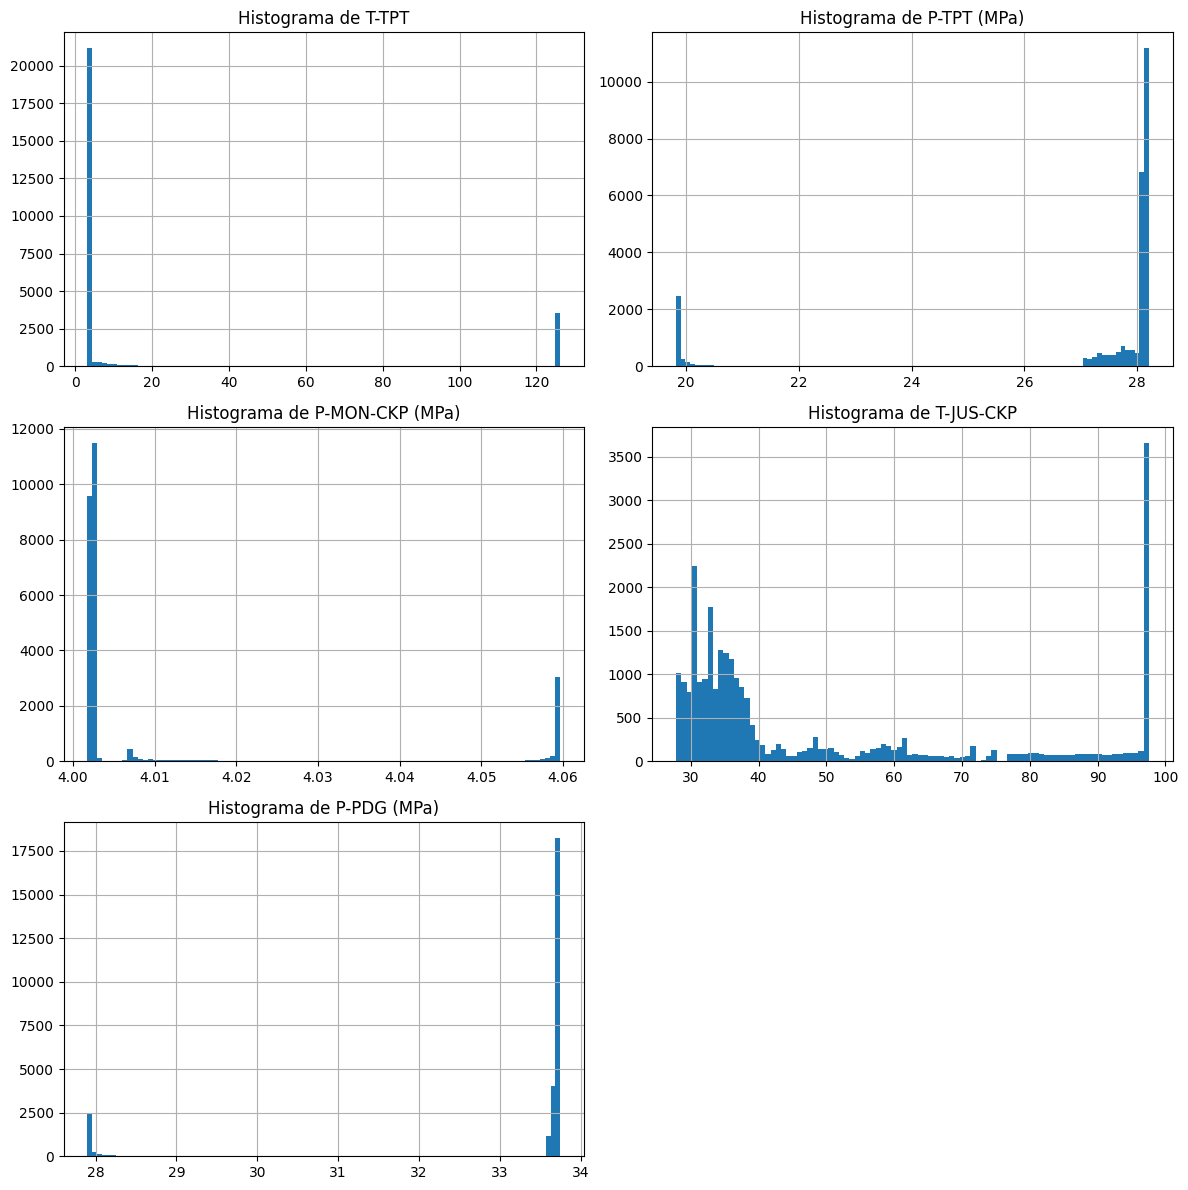

In [68]:
import matplotlib.pyplot as plt
import numpy as np

file_simulated_1='SIMULATED_00001.csv'
df_simulated_1=dfs[file_simulated_1]
n=12699

variables = ["T-TPT", "P-TPT (MPa)", "P-MON-CKP (MPa)", "T-JUS-CKP", "P-PDG (MPa)"]

intervalos_scott = {}

# Calcular el intervalo de Scott para cada variable
for var in variables:
    std = df_simulated_1[var].std()  # Desviaci칩n est치ndar de la variable
    intervalo_scott = (3.5 * std) / np.sqrt(n)
    intervalos_scott[var] = intervalo_scott

# Graficar los histogramas
plt.figure(figsize=(12, 12))

for i, var in enumerate(variables, 1):
    plt.subplot(3, 2, i)  # Distribuir los gr치ficos en una cuadr칤cula 3x2
    intervalo_scott = intervalos_scott[var]  # Obtener el intervalo de Scott para la variable
    bins = int((df_simulated_1[var].max() - df_simulated_1[var].min()) / intervalo_scott)  # Calcular el n칰mero de bins
    df_simulated_1[var].hist(bins=bins)
    plt.title(f'Histograma de {var}')

plt.tight_layout()  # Ajustar autom치ticamente los espacios entre gr치ficos
plt.show()

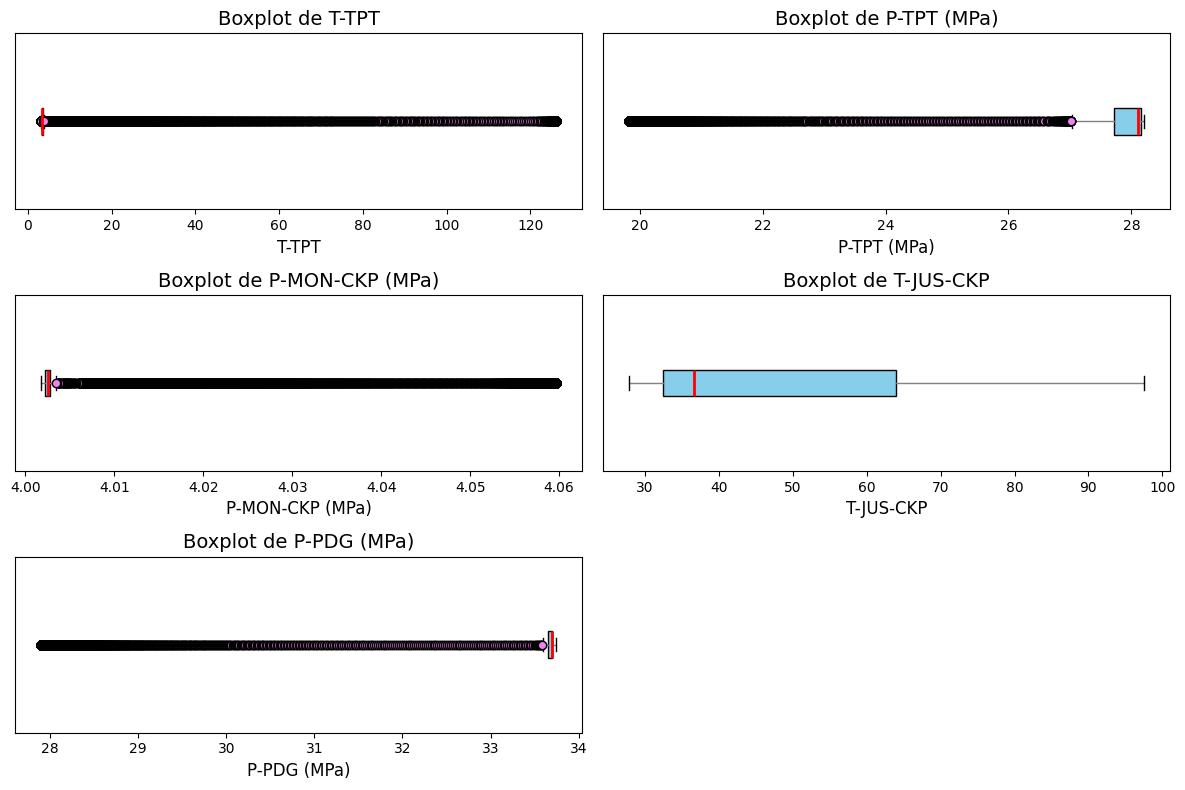

In [69]:
# Graficar los boxplots
plt.figure(figsize=(12, 8))

# Definir propiedades para los outliers (m치s personalizable)
flierprops = dict(marker='o', markerfacecolor='violet', markersize=6, linestyle='none', markeredgecolor='black')
for i, var in enumerate(variables, 1):
    plt.subplot(3, 2, i)
    boxplot_parts = plt.boxplot(df_simulated_1[var], vert=False, flierprops=flierprops, patch_artist=True)

    # boxprops para el color de la caja
    boxplot_parts['boxes'][0].set(facecolor='skyblue', edgecolor='black')  # Color de la caja y borde

    # whiskerprops para el color de los "bigotes"
    for whisker in boxplot_parts['whiskers']:
        whisker.set(color='gray')

    # medianprops para el color y grosor de la mediana
    for median in boxplot_parts['medians']:
        median.set(color='red', linewidth=2)

    plt.title(f'Boxplot de {var}', fontsize=14)
    plt.xlabel(var, fontsize=12)
    plt.yticks([])

plt.tight_layout()
plt.show()

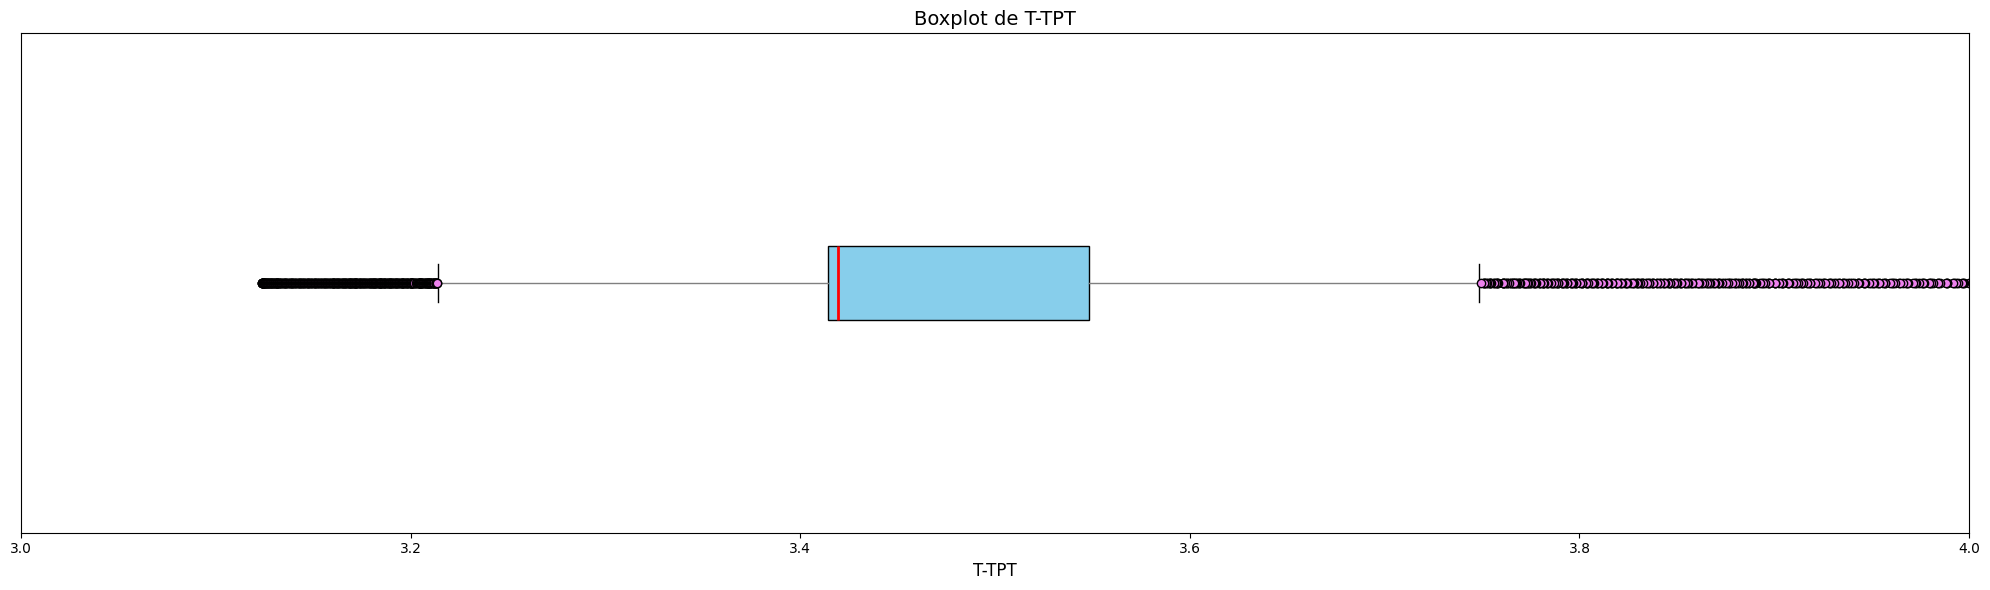

In [70]:
# Grafico de nuevo el boxplot de T-TPT con otro tama침o y cortando los outliers porque debo visualizar la caja
plt.figure(figsize=(20, 6))  # Ajustar tama침o de la figura si es necesario

# Definir propiedades para los outliers
flierprops = dict(marker='o', markerfacecolor='violet', markersize=6, linestyle='none', markeredgecolor='black')

boxplot_parts = plt.boxplot(df_simulated_1['T-TPT'], vert=False, flierprops=flierprops, patch_artist=True)

# Estilos para la caja, bigotes y mediana (como antes)
boxplot_parts['boxes'][0].set(facecolor='skyblue', edgecolor='black')
for whisker in boxplot_parts['whiskers']:
    whisker.set(color='gray')
for median in boxplot_parts['medians']:
    median.set(color='red', linewidth=2)

plt.title('Boxplot de T-TPT', fontsize=14)
plt.xlabel('T-TPT', fontsize=12)
plt.yticks([])  # Ocultar ticks del eje Y

# Ajustar la escala horizontal (eje X)
plt.xlim(3, 4)  # Ajusta los l칤mites seg칰n tus datos

plt.tight_layout()
plt.show()

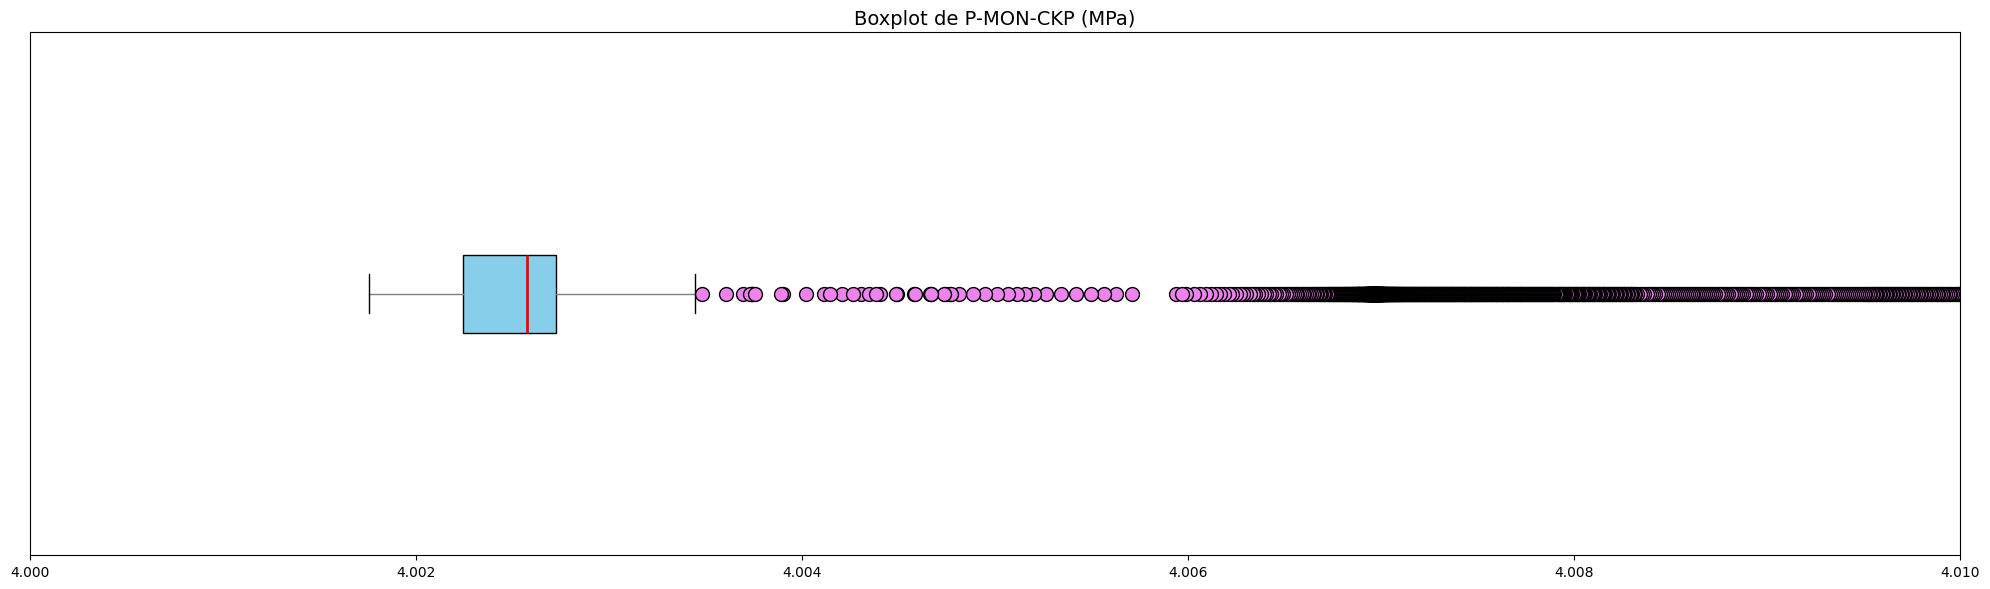

In [71]:
# Grafico de nuevo el boxplot de P-MON-CKP con otro tama침o y cortando los outliers porque debo visualizar la caja
plt.figure(figsize=(20, 6))  # Ajustar tama침o de la figura si es necesario

# Definir propiedades para los outliers
flierprops = dict(marker='o', markerfacecolor='violet', markersize=10, linestyle='none', markeredgecolor='black')

boxplot_parts = plt.boxplot(df_simulated_1['P-MON-CKP (MPa)'], vert=False, flierprops=flierprops, patch_artist=True)

# Estilos para la caja, bigotes y mediana (como antes)
boxplot_parts['boxes'][0].set(facecolor='skyblue', edgecolor='black')
for whisker in boxplot_parts['whiskers']:
    whisker.set(color='gray')
for median in boxplot_parts['medians']:
    median.set(color='red', linewidth=2)

plt.title('Boxplot de P-MON-CKP (MPa)', fontsize=14)
plt.yticks([])  # Ocultar ticks del eje Y

# Ajustar la escala horizontal (eje X)
plt.xlim(4, 4.01)  # Ajusta los l칤mites seg칰n tus datos

plt.tight_layout()
plt.show()

En cuanto a la variable **T-TPT**, el **histograma** sugiere que los valores se concentran m치s en los extremos que en el centro, con una mayor frecuencia de temperaturas bajas en comparaci칩n con las altas. Este patr칩n es consistente con la asimetr칤a positiva previamente indicada por la media mayor a la mediana (cola larga a la derecha). Es decir, existen valores muy altos (outliers o valores at칤picos) que est치n elevando la media. Aunque las temperaturas bajas son m치s frecuentes, los valores extremos elevados, aunque pocos, son lo suficientemente grandes como para desplazar la media hacia valores m치s altos, lo que refuerza la presencia de una asimetr칤a positiva en la distribuci칩n.
Al observar el **boxplot**, se pueden ver varios outliers de temperaturas altas. La caja se extiende desde aproximadamente 3.4 hasta 3.55, lo que indica que el 50% central de los datos de T-TPT se encuentra en este rango. La l칤nea de la mediana est치 ligeramente m치s cerca del borde inferior de la caja, lo que sugiere una asimetr칤a hacia los valores m치s altos. Adem치s, varios puntos at칤picos se encuentran por encima del bigote superior, lo que confirma la presencia de valores inusualmente altos en los datos.

El an치lisis del **histograma de P-TPT** revela una distribuci칩n peculiar, con una concentraci칩n significativa de valores en los extremos. Se observan picos prominentes alrededor de 20 MPa y, especialmente, en 28 MPa.
El **boxplot** complementa esta visi칩n mostrando una dispersi칩n considerable de los datos, con una mediana ubicada cerca del tercer cuartil (Q3). La presencia de varios outliers por debajo del l칤mite inferior sugiere la existencia de valores inusualmente bajos de P-TPT que podr칤an merecer una investigaci칩n m치s profunda. La ausencia de outliers por encima del l칤mite superior indica que no hay valores extremadamente altos que se desv칤en significativamente del resto de la distribuci칩n.

---

El **histograma de presion aguas arriba P-MON-PCK** revela una distribuci칩n con una alta frecuencia de valores centrados en 4 y 4.06 MPa. Esta concentraci칩n de valores sugiere una posible distribuci칩n sim칠trica, aunque con una ligera asimetr칤a positiva (cola hacia la derecha).
El **boxplot** complementa esta informaci칩n mostrando una dispersi칩n considerable de los datos, con una mediana ligeramente desplazada hacia el tercer cuartil (Q3). La presencia de varios outliers por encima del l칤mite superior indica la existencia de valores inusualmente altos de P-MON-PCK que se desv칤an significativamente del resto de la distribuci칩n. Estos outliers podr칤an brindar informaci칩n relevante sobre el sistema en estudio por lo que no se van a descartar.


El **histograma de la temperatura aguas abajo (T-JUS-CKP)** revela una dispersi칩n considerable de los datos. Si bien la media se sit칰a en 50춿C y la mediana en 36.63춿C, esta diferencia sugiere una distribuci칩n asim칠trica, con valores extremos que elevan la media. En efecto, se observan picos de temperatura significativamente altos, mientras que la mayor칤a de los datos se concentran en valores m치s bajos, entre 30 y 40춿C.
El **boxplot** confirma esta asimetr칤a y dispersi칩n, mostrando una distribuci칩n donde no se identifican outliers. Esto implica que, si bien existen valores altos de temperatura, estos no se consideran at칤picos seg칰n el criterio del boxplot.

---

Los **valores de presi칩n en el man칩metro (P-PDG)** se concentran frecuentemente entre 33 y 34 MPa, lo que sugiere un rango t칤pico de operaci칩n del sistema. Sin embargo, se identifican algunos outliers en 28 MPa, lo que indica la presencia de eventos o condiciones inusuales que resultan en presiones m치s bajas. Estos outliers podr칤an indicar informaci칩n relevante sobre el sistema en estudio.




### An치lisis de los datos reales

En el archivo correspondiente al pozo WELL-00019, se observan las siguientes caracter칤sticas:

T-JUS-CKP: En este caso, las medidas estad칤sticas son todas NaN. Al verificar contra el archivo CSV original, se confirma que esta columna no contiene ning칰n valor en dicho archivo.

Presiones: Para las dem치s variables de presi칩n, los valores resultan ser 0, ya que todos los registros en este archivo contienen 0 en esas columnas.

P-MON-CKP: Esta variable presenta una media de 1.40 MPa y una mediana de 1.18 MPa, con un valor m치ximo de 3.15 MPa. Adem치s, la desviaci칩n est치ndar es muy peque침a, lo que sugiere una distribuci칩n bastante estable. Este comportamiento se mantiene en los archivos de los otros dos pozos, WELL-00020 y WELL-00021, donde los datos de esta variable son consistentes y presentan medidas estad칤sticas similares.

Para el pozo WELL-00020:

T-TPT: La media es de 21춿C, mientras que la mediana es de 14.97춿C, con una desviaci칩n est치ndar de 14춿C. Esto indica que podr칤a tratarse de una distribuci칩n asim칠trica.

P-TPT: La media es de 1378.7 MPa y la mediana de 1405.1 MPa. Dado que la media y la mediana son bastante similares, no parece haber una desviaci칩n asim칠trica significativa en esta variable.

P-MON-CKP: La media es de 2.97 MPa y la mediana de 3.15 MPa, lo que indica una distribuci칩n sim칠trica.

T-JUS-CKP: No se encuentran valores en este pozo.

P-PDG (presi칩n en el man칩metro): La media es de 2254 MPa y la mediana de 2262 MPa, con valores bastante cercanos, lo que sugiere una distribuci칩n sim칠trica.

Una observaci칩n importante es la diferencia entre las presiones reales y las de los datos simulados. Esto podr칤a deberse a la naturaleza de los modelos de simulaci칩n, que no siempre replican con precisi칩n las condiciones reales del pozo. Es recomendable investigar este aspecto para comprender mejor las discrepancias.

Para el pozo WELL-00021:

T-TPT: La media es de 13춿C y la mediana de 16춿C, con una desviaci칩n est치ndar de 5.47춿C. Esto indica una distribuci칩n con ligera asimetr칤a, pero los valores no parecen estar excesivamente dispersos.

P-TPT: La media es de 1448 MPa y la mediana de 1648 MPa, lo que sugiere que podr칤an existir outliers (valores extremos), ya que la diferencia entre la media y la mediana es considerable. El valor m치ximo observado en esta columna es de 1979 MPa, lo que refuerza la hip칩tesis de la presencia de valores at칤picos.

P-MON-CKP: La media es de 1.42 MPa y la mediana de 1.33 MPa, lo que indica que los valores se mantienen cercanos, sugiriendo una distribuci칩n sim칠trica.

T-JUS-CKP: No contiene valores en este pozo.

P-PDG: La media es de 3085 MPa y la mediana de 3084 MPa, lo que indica que esta variable no presenta fluctuaciones importantes en este pozo.

Conclusiones finales:

En los datos de los pozos WELL-00019 y WELL-00020, los valores de temperatura y presi칩n parecen seguir patrones consistentes, aunque se observan algunas columnas con valores faltantes, como es el caso de T-JUS-CKP. Por otro lado, las presiones de los pozos reales, en particular P-TPT y P-MON-CKP, muestran una estabilidad que podr칤a sugerir una distribuci칩n sim칠trica en su mayor칤a. Sin embargo, en el pozo WELL-00021, la presencia de outliers en P-TPT requiere una atenci칩n especial, ya que estos valores at칤picos podr칤an influir en la interpretaci칩n del comportamiento de las presiones.


---

Haremos uso de los histogramas para vsualizar la informacion real de los pozos WELL-00020 y WEL-00021 y en este caso se analizaran de forma mas resumida los datos. Luego se proceder치 con la evaluaci칩n mediante boxplots para identificar los outliers en caso de ser necesario. Este an치lisis no tiene como objetivo eliminar ni descartar los datos, sino que sera util para luego identificar los timestamps correspondientes a los valores at칤picos y analizar su posible relaci칩n con la formaci칩n de hidratos. Este enfoque permitir치 evaluar si existe un patr칩n entre la presencia de valores at칤picos y las condiciones que favorecen la formaci칩n de hidratos.



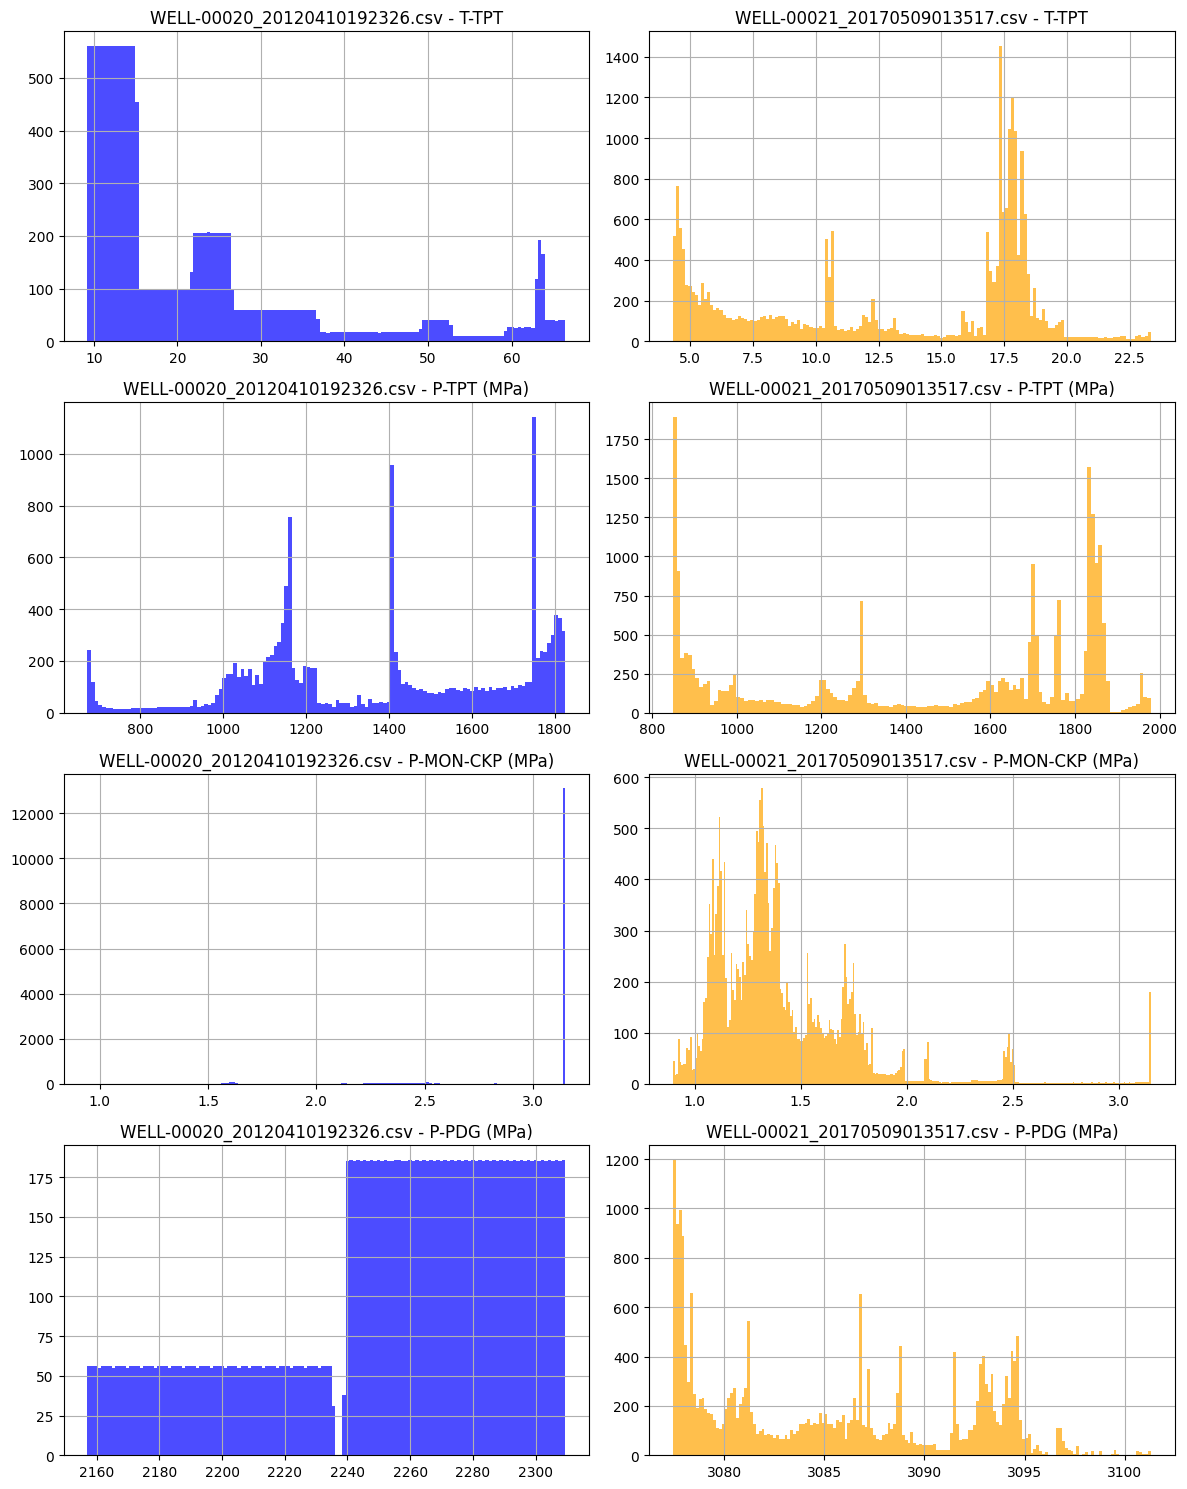

In [72]:
import matplotlib.pyplot as plt
import numpy as np

file_well_20='WELL-00020_20120410192326.csv'
file_well_21='WELL-00021_20170509013517.csv'
df_well_20=dfs[file_well_20]
df_well_21=dfs[file_well_21]

files_selected= {file_well_20: df_well_20, file_well_21: df_well_21 }

variables = ["T-TPT", "P-TPT (MPa)", "P-MON-CKP (MPa)", "P-PDG (MPa)"] # No analizamos de aca T-JUS-CKP porque no tiene valores
# Diccionario para almacenar los intervalos de Scott
intervalos_scott = {file: {} for file in files_selected}

# Calcular el intervalo de Scott para cada variable en cada archivo
for file_name, dff in files_selected.items():
    n = len(dff)  # Cantidad de datos
    for var in variables:
        std = dff[var].std()  # Desviaci칩n est치ndar de la variable
        intervalo_scott = (3.5 * std) / np.sqrt(n)  # C치lculo del intervalo de Scott
        intervalos_scott[file_name][var] = intervalo_scott  # Guardar en el diccionario

# Graficar los histogramas comparando ambos archivos
fig, axes = plt.subplots(len(variables), 2, figsize=(12, 15))  # Dos columnas para comparar

for i, var in enumerate(variables):
    for j, (file_name, dff) in enumerate(files_selected.items()):
        ax = axes[i, j]  # Selecciona la posici칩n en la cuadr칤cula
        intervalo_scott = intervalos_scott[file_name][var]  # Obtener el intervalo de Scott
        bins = int((dff[var].max() - dff[var].min()) / intervalo_scott)  # Calcular el n칰mero de bins
        dff[var].hist(bins=bins, ax=ax, alpha=0.7, color="blue" if j == 0 else "orange")
        ax.set_title(f'{file_name} - {var}')

plt.tight_layout()  # Ajustar autom치ticamente los espacios entre gr치ficos
plt.show()

En general, se observa que los datos reales no presentan valores at칤picos en comparaci칩n con los datos simulados, salvo en el caso de la presi칩n P-MON-CKP en el pozo WELL-00020.
Analizando cada variable en detalle:

Temperatura en el transductor T-TPT:

En el pozo WELL-00021, la mayor칤a de los valores se encuentran entre 10 y 30춿C, con una media de 21춿C y algunos registros alrededor de 60춿C. Debido a la presencia de estos valores altos, la mediana es menor que la media (15춿C).
En el pozo WELL-00020, los valores de temperatura son generalmente m치s bajos, con una media de 13춿C y una mayor concentraci칩n de datos en torno a 18춿C, lo que explica que la mediana sea ligeramente mayor (16춿C).

Presi칩n en el transductor P-TPT:

En el pozo WELL-00020, se observan tres picos pronunciados en 1800 MPa, 1400 MPa y 1750 MPa. (Esto sera importante tenerlo en cuenta a la hora de graficar estos valores vs la etiqueta del evento no deseado de la formacion de hidratos)
En el pozo WELL-00021, destaca un pico muy pronunciado en 850 MPa, adem치s de otros menos marcados en 1700 MPa y 1900 MPa.

Presion aguas abajo del CKP P-MON-CKP:

La P-MON-CKP en el pozo WELL-00020 presenta la mayor frecuencia de valores en 3 MPa, mientras que el resto se distribuye en valores m치s bajos. Se muestra mas abajo su boxplot para identificar estos outliers.

En el pozo WELL-00021, la distribuci칩n de valores es m치s amplia, lo que concuerda con su media de 1.42 MPa y mediana de 1.33 MPa. Se verifico con su boxplot que poseen algunos outliers altos, pero en esta instancia no se ve una relacion directa con la formacion de hidratos.

Presion manometro PDG:

Por otro lado, la presi칩n en el man칩metro PDG en el pozo WELL-00020 sugiere que, durante el mismo per칤odo de tiempo (55 ocurrencias), la presi칩n se mantuvo en distintos valores entre 2160 y 2235 MPa. Se sospecha que durante un periodo de tiempo constante, la presion iba variando y se mantenia el mismo periodo de tiempo en distintos valores. Posteriormente, la presi칩n comienza a aumentar, alcanzando 2240 MPa, ahora manteniendose por mayor periodo de tiempo pero constante nuevamente, hasta 2300 Mpa. Esto sera evaluado luego al graficar versus el tiempo esta variable. Tambien es interesante que en esta variable para este pozo no se pudo graficar el boxplot con el mismo algoritmo que se urilizo en todos los casos.

En el pozo WELL-00021, se registran picos de presi칩n superiores a 3075 MPa, alcanzando hasta 3100 MPa.

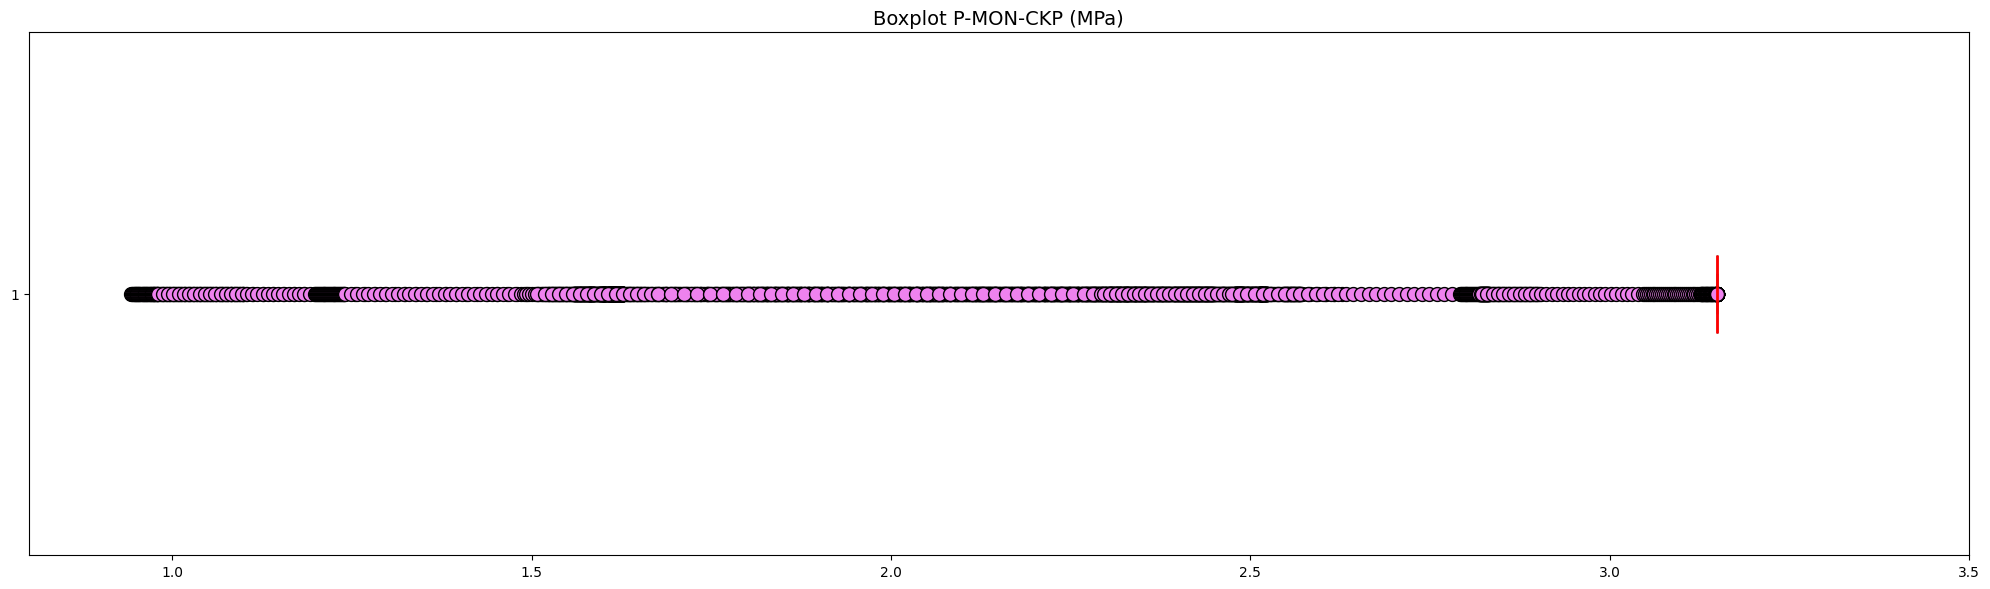

In [73]:
plt.figure(figsize=(20, 6))  # Ajustar tama침o de la figura si es necesario

# Definir propiedades para los outliers
flierprops = dict(marker='o', markerfacecolor='violet', markersize=10, linestyle='none', markeredgecolor='black')

boxplot_parts = plt.boxplot(df_well_20["P-MON-CKP (MPa)"], vert=False, flierprops=flierprops, patch_artist=True)

# Estilos para la caja, bigotes y mediana (como antes)
boxplot_parts['boxes'][0].set(facecolor='skyblue', edgecolor='black')
for whisker in boxplot_parts['whiskers']:
    whisker.set(color='gray')
for median in boxplot_parts['medians']:
    median.set(color='red', linewidth=2)

plt.title('Boxplot P-MON-CKP (MPa)', fontsize=14)
# plt.yticks([])  # Ocultar ticks del eje Y

# Ajustar la escala horizontal (eje X)
plt.xlim(0.8, 3.5)  # Ajusta los l칤mites seg칰n tus datos

plt.tight_layout()
plt.show()

# Estudio de variables a lo largo del tiempo

En esta secci칩n, se presentan gr치ficos que muestran la evoluci칩n de las variables vistas a lo largo del tiempo para datos simulados y reales de los pozos WELL-00020 y WELL-0021.

El objetivo de esta visualizaci칩n es analizar la variaci칩n de estas variables con el tiempo y evaluar su relaci칩n con el evento no deseado de formacion de hidratos. Para ello, se incluye en cada gr치fico una segunda curva que representa la variable class, cuyos valores (0, 130 y 3) indican el evento normal (0) o el Faulty Transient (Transitorio Defectuoso 103) o Faulty Steady State (Estado Estable Defectuoso 3).

Esta representaci칩n gr치fica permitir치 identificar tendencias y posibles patrones en los datos, facilitando una interpretaci칩n visual de c칩mo la temperatura y la presi칩n pueden estar asociadas con la formaci칩n de hidratos en cada pozo y conjunto de datos simulado.

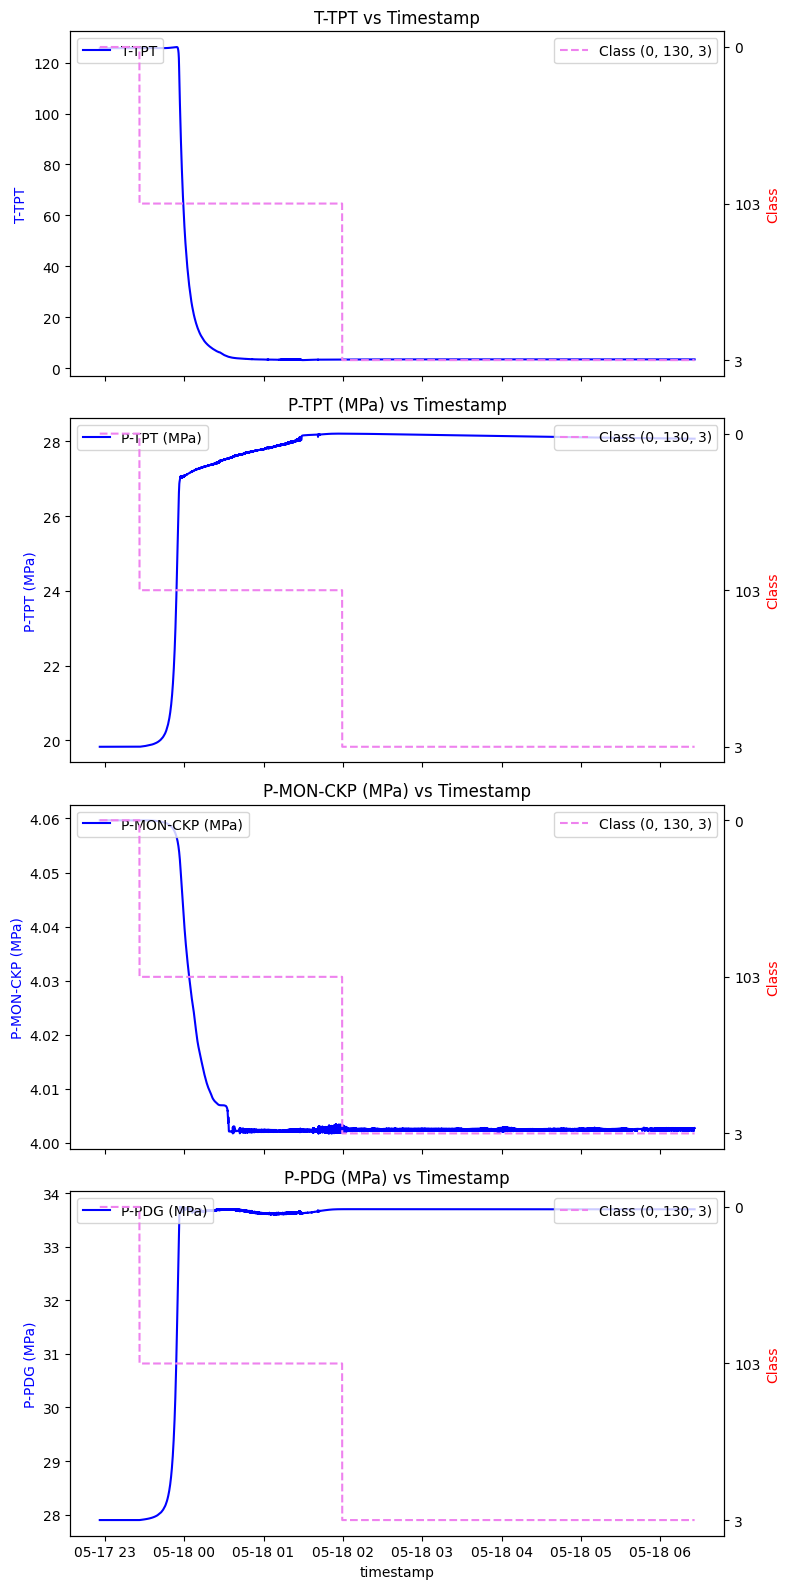

In [74]:
## PRIMER ARCHIVO SIMULADO
import seaborn as sns

# Primer eje Y: Graficar la variable (ejemplo: presi칩n o temperatura)
df_simulated_1["timestamp"] = pd.to_datetime(df_simulated_1["timestamp"])  # Asegurar formato de fecha
df_simulated_1=df_simulated_1.sort_values(by="timestamp") #en el csv se veia ordenado, pero nos aseguramos igual

variables_ejey = ["T-TPT", "P-TPT (MPa)", "P-MON-CKP (MPa)", "T-JUS-CKP", "P-PDG (MPa)"]

fig, axes = plt.subplots(len(variables), 1, figsize=(8, 4 * len(variables)), sharex=True)

for i, var in enumerate(variables):
    ax1 = axes[i]  # Primer eje Y
    sns.lineplot(x=df_simulated_1["timestamp"], y=df_simulated_1[var], ax=ax1, label=var, color="blue")
    ax1.set_ylabel(var, color="blue")

    # Crear segundo eje Y
    ax2 = ax1.twinx()
    sns.lineplot(x=df_simulated_1["timestamp"], y=df_simulated_1["class"], ax=ax2, color="violet", linestyle="dashed", label="Class (0, 130, 3)")
    ax2.set_ylabel("Class", color="red")

    ax1.set_title(f"{var} vs Timestamp")
    ax1.legend(loc="upper left")
    ax2.legend(loc="upper right")

plt.xlabel("Timestamp")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Como era de esperarse, la formaci칩n no deseada de hidratos se manifiesta claramente en valores bajos de temperatura (T-TPT) y altos de presi칩n en el transductor (P-TPT), en concordancia con las mediciones de presi칩n en el man칩metro (P-PDG).

Por otro lado, la presi칩n aguas arriba de la v치lvula de control de presi칩n (PCK) comienza a disminuir a medida que se produce la formaci칩n de hidratos. Este fen칩meno puede generar una obstrucci칩n parcial del flujo, incrementando la resistencia al paso del gas y del fluido. Dicha obstrucci칩n provoca una ca칤da de presi칩n aguas arriba de la v치lvula de producci칩n, ya que el flujo se ve dificultado por la acumulaci칩n de cristales de hidrato. Cuando el gas natural entra en contacto con el agua en condiciones de baja temperatura y alta presi칩n, se forman los hidratos, lo que contribuye a la disminuci칩n de la presi칩n en la l칤nea de producci칩n.

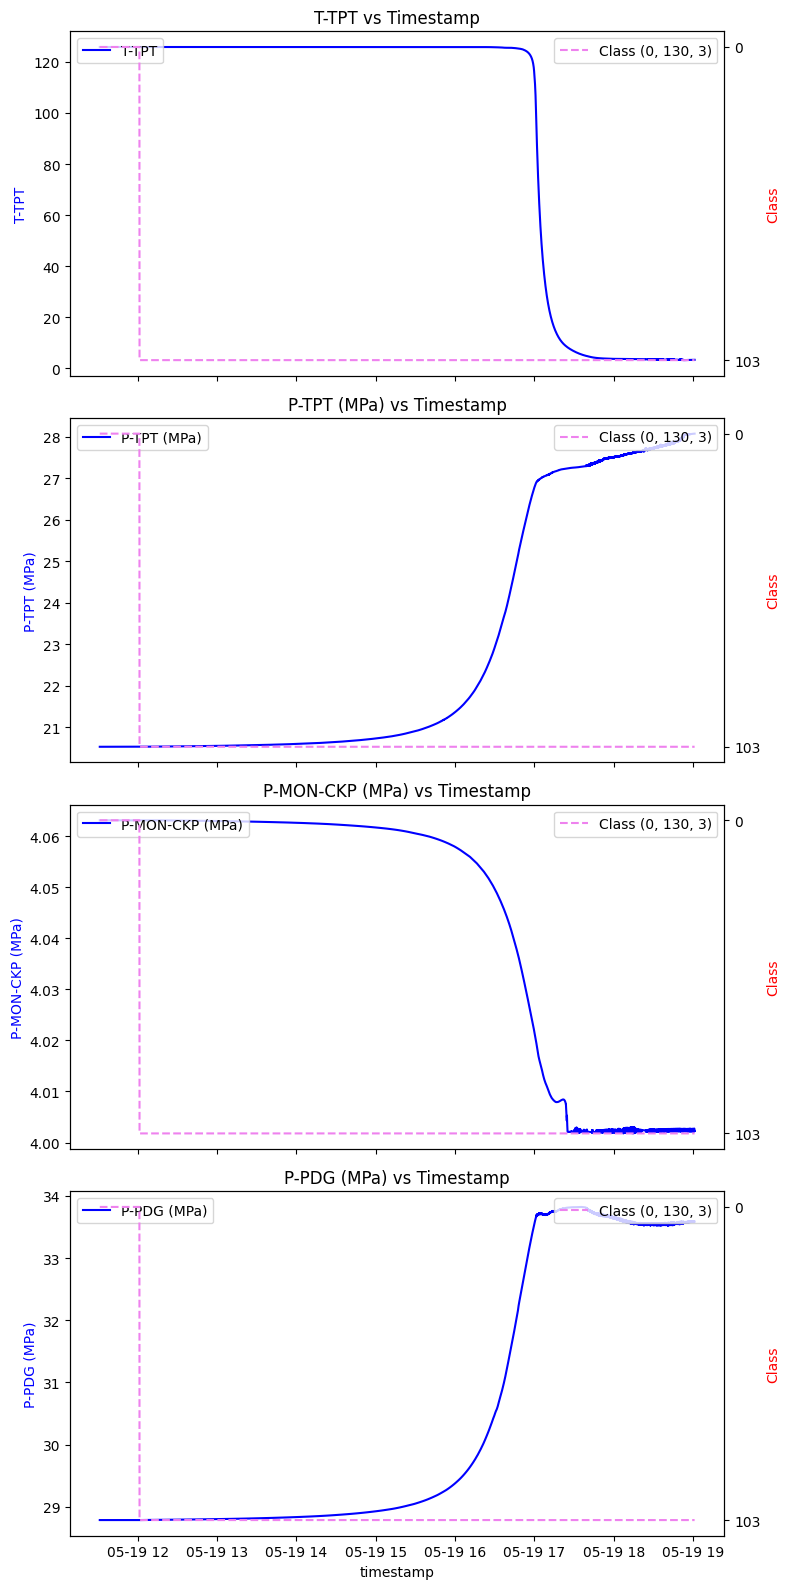

In [75]:
# ULTIMO ARCHIVO SIMULADO
# Primer eje Y: Graficar la variable (ejemplo: presi칩n o temperatura)
file_simulated_81='SIMULATED_00081.csv'
df_simulated_81=dfs[file_simulated_81]

df_simulated_81["timestamp"] = pd.to_datetime(df_simulated_81["timestamp"])  # Asegurar formato de fecha
df_simulated_81=df_simulated_81.sort_values(by="timestamp") #en el csv se veia ordenado, pero nos aseguramos igual

variables_ejey = ["T-TPT", "P-TPT (MPa)", "P-MON-CKP (MPa)", "T-JUS-CKP", "P-PDG (MPa)"]

fig, axes = plt.subplots(len(variables), 1, figsize=(8, 4 * len(variables)), sharex=True)

for i, var in enumerate(variables):
    ax1 = axes[i]  # Primer eje Y
    sns.lineplot(x=df_simulated_81["timestamp"], y=df_simulated_81[var], ax=ax1, label=var, color="blue")
    ax1.set_ylabel(var, color="blue")

    # Crear segundo eje Y
    ax2 = ax1.twinx()
    sns.lineplot(x=df_simulated_81["timestamp"], y=df_simulated_81["class"], ax=ax2, color="violet", linestyle="dashed", label="Class (0, 130, 3)")
    ax2.set_ylabel("Class", color="red")

    ax1.set_title(f"{var} vs Timestamp")
    ax1.legend(loc="upper left")
    ax2.legend(loc="upper right")

plt.xlabel("Timestamp")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

En el segundo conjunto de datos simulado, el evento 103 se presenta nuevamente a bajas temperaturas en el traductor T-TPT y con valores elevados de presi칩n en P-TPT, en concordancia con los valores de P-PDG. La principal diferencia en este caso es que los valores se mantienen por un per칤odo prolongado en niveles altos de T y en valores bajos de P-TPT y P-PDG. Sin embargo, el evento 103 se hace evidente incluso antes de que los valores de T comiencen a descender y los de P aumenten. Es probable que este conjunto de datos corresponda a un momento previo a la formaci칩n de hidratos. Dado que se trata de simulaciones, es posible que se est칠 enfocando en los par치metros previos al evento no deseado, esto es lo que el documento explicativo de los datos llama como per칤odos transitorios defectuosos.

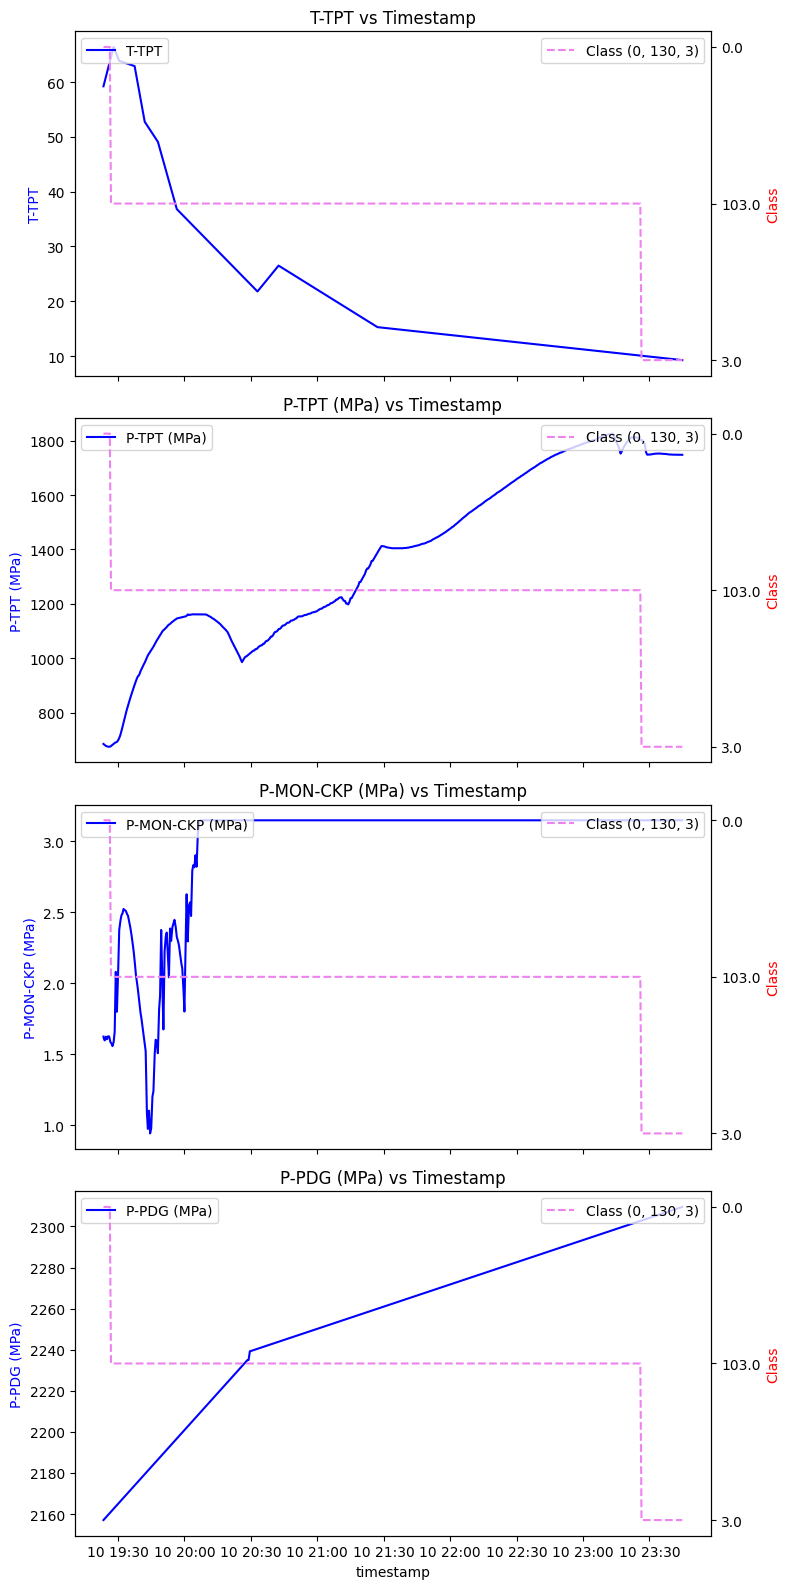

In [76]:
## POZO WELL-00020

# Primer eje Y: Graficar la variable (ejemplo: presi칩n o temperatura)
df_well_20["timestamp"] = pd.to_datetime(df_well_20["timestamp"])  # Asegurar formato de fecha
df_well_20=df_well_20.sort_values(by="timestamp") #en el csv se veia ordenado, pero nos aseguramos igual

##se encontraron NaN en la columna class
# Filtrar las filas donde 'class' es igual a la cadena 'nan' (mas arriba la habia pasado a string)
nan_rows = df_well_20[df_well_20['class'] == 'nan']

# Visualiza los registros completos con NaN en la columna 'class'
# print(nan_rows)
filtered_df_well_20 = df_well_20[df_well_20['class'] != 'nan']

variables_ejey = ["T-TPT", "P-TPT (MPa)", "P-MON-CKP (MPa)", "T-JUS-CKP", "P-PDG (MPa)"]

fig, axes = plt.subplots(len(variables), 1, figsize=(8, 4 * len(variables)), sharex=True)

for i, var in enumerate(variables):
    ax1 = axes[i]  # Primer eje Y
    sns.lineplot(x=df_well_20["timestamp"], y=df_well_20[var], ax=ax1, label=var, color="blue")
    ax1.set_ylabel(var, color="blue")

    # Crear segundo eje Y
    ax2 = ax1.twinx()
    sns.lineplot(x=filtered_df_well_20["timestamp"], y=filtered_df_well_20["class"], ax=ax2, color="violet", linestyle="dashed", label="Class (0, 130, 3)")
    ax2.set_ylabel("Class", color="red")

    ax1.set_title(f"{var} vs Timestamp")
    ax1.legend(loc="upper left")
    ax2.legend(loc="upper right")

plt.xlabel("Timestamp")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

En este pozo, se observ칩 inicialmente que algunos registros no estaban etiquetados, por lo que se aplic칩 un filtro para la curva Class exclusivamente, sin filtrar las curvas de las variables en funci칩n del tiempo.

En t칠rminos generales, los valores mostrados son m치s realistas, ya que las curvas no presentan un comportamiento exponencial (ni de aumento ni de disminuci칩n). En su lugar, se evidencian fluctuaciones al aumentar o disminuir.

Se puede visualizar que el evento de tipo transitorio defectuoso comienza cuando la temperatura en el transductor **T-TPT** baja de +60춿C a menos de 40춿C. La formaci칩n de hidratos finalmente ocurre cuando la temperatura desciende a **10춿C**. En relaci칩n con la presi칩n en el transductor **P-TPT**, el evento transitorio defectuoso comienza cuando la presi칩n aumenta desde 676 MPa y finalmente se estabiliza en aproximadamente **1800 MPa.**

En cuanto a la presi칩n en el man칩metro **P-PDG**, se observa un aumento lineal al principio con una pendiente m치s pronunciada hasta llegar a 2240 MPa, seguido de una pendiente menor hasta alcanzar los 2300 MPa. Esto explica por qu칠 el histograma mostr칩 dos picos con techos bastante planos. Cuando la presi칩n del pozo supera los **2300 MPa**, el evento de formaci칩n de hidratos se estabiliza.

La presi칩n aguas arriba de la v치lvula de choke de producci칩n P-MON-CKP fluct칰a inicialmente, pero luego se mantiene estable en 3 MPa, lo cual difiere de los escenarios simulados, donde la presi칩n aumenta. Esto podria deberse a las condiciones iniciales ya que en los escenarios simulados baja hasta 4MPa y en este caso se estabiliza en 3MPa.

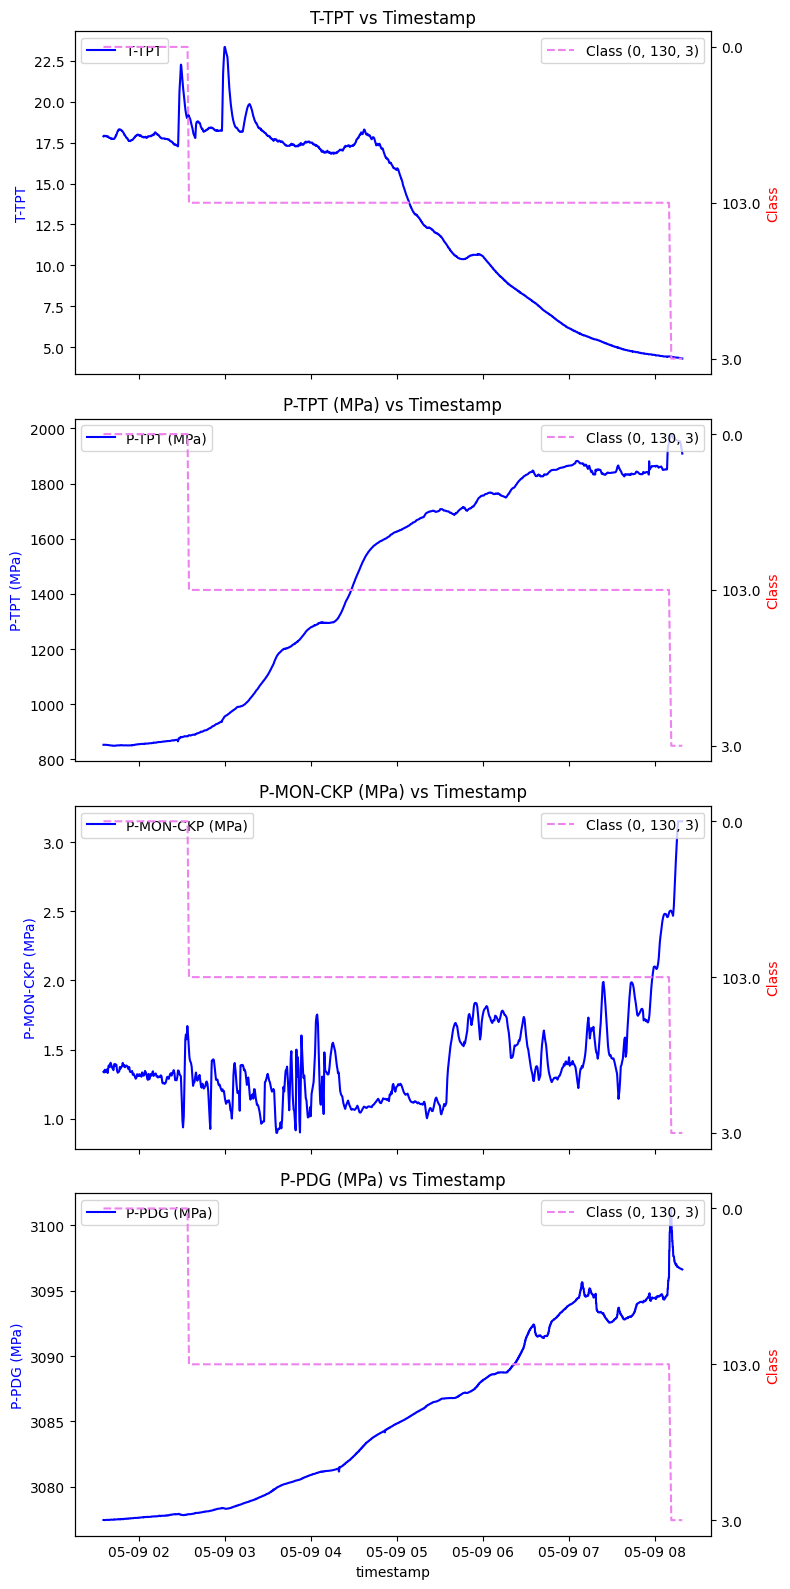

In [78]:
## POZO WELL-00021

# Primer eje Y: Graficar la variable (ejemplo: presi칩n o temperatura)
df_well_21["timestamp"] = pd.to_datetime(df_well_21["timestamp"])  # Asegurar formato de fecha
df_well_21=df_well_21.sort_values(by="timestamp") #en el csv se veia ordenado, pero nos aseguramos igual

##se encontraron NaN en la columna class
# Filtrar las filas donde 'class' es igual a la cadena 'nan' (mas arriba la habia pasado a string)
nan_rows = df_well_21[df_well_21['class'] == 'nan']

# Visualiza los registros completos con NaN en la columna 'class'
# print(nan_rows)
filtered_df_well_21 = df_well_21[df_well_21['class'] != 'nan']

variables_ejey = ["T-TPT", "P-TPT (MPa)", "P-MON-CKP (MPa)", "T-JUS-CKP", "P-PDG (MPa)"]

fig, axes = plt.subplots(len(variables), 1, figsize=(8, 4 * len(variables)), sharex=True)

for i, var in enumerate(variables):
    ax1 = axes[i]  # Primer eje Y
    sns.lineplot(x=df_well_21["timestamp"], y=df_well_21[var], ax=ax1, label=var, color="blue")
    ax1.set_ylabel(var, color="blue")

    # Crear segundo eje Y
    ax2 = ax1.twinx()
    sns.lineplot(x=filtered_df_well_21["timestamp"], y=filtered_df_well_21["class"], ax=ax2, color="violet", linestyle="dashed", label="Class (0, 130, 3)")
    ax2.set_ylabel("Class", color="red")

    ax1.set_title(f"{var} vs Timestamp")
    ax1.legend(loc="upper left")
    ax2.legend(loc="upper right")

plt.xlabel("Timestamp")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

En el pozo WELL_0021, tanto la temperatura como la presi칩n en el transductor **T-TPT** y **P-TPT** siguen una tendencia similar al pozo WELL_0020 respecto a los eventos transitorios defectuosos y estables defectuosos. La formaci칩n de hidratos comienza a establecerse cuando la temperatura alcanza los **5춿C** y la presi칩n supera los **1800 MPa.**

La presi칩n de fondo del pozo **P-PDG** muestra un aumento gradual, y el evento de formaci칩n de hidratos se produce a presiones superiores a **3095 MPa.**

En cuanto a la presi칩n aguas arriba de la v치lvula de choke de producci칩n P-MON-CKP, se observa un comportamiento similar al del pozo anterior. Comienza con un valor inicial de 1.4 MPa, presenta fluctuaciones durante los eventos transitorios defectuosos, y durante la formaci칩n estable de hidratos, la presi칩n aumenta hasta alcanzar los 3 MPa.



# Conclusi칩n General del analisis de datos

El an치lisis de los datos de temperatura (T-TPT) y presi칩n (P-TPT) en los eventos de formaci칩n de hidratos ha permitido identificar patrones y diferencias significativas tanto en los pozos reales como en los datos simulados. En los pozos reales, los eventos de formaci칩n de hidratos se inician cuando la temperatura en el transductor baja por debajo de un umbral cr칤tico, generalmente alrededor de los 10/5춿C en datos reales y 3춿C en datos simulados, y las presiones superan los 1800 MPa en casos reales y 28 MPa en escenarios simulados.  Esta discrepancia podria deberse a que los datos simulados han sido generados bajo condiciones m치s controladas y dentro de rangos operativos definidos, mientras que los datos reales reflejan la variabilidad de los pozos en operaci칩n, incluyendo condiciones extremas que pueden presentarse en la industria.

La formaci칩n de hidratos en pozos reales tambien depende en gran medida de la cantidad de agua presente en la corriente de gas, as칤 como de la composici칩n de los hidrocarburos, que influye en la temperatura y presi칩n a las cuales los hidratos pueden formarse. En pozos con mayor contenido de agua o hidrocarburos m치s pesados, la formaci칩n de hidratos puede ocurrir a presiones m치s bajas o temperaturas m치s altas, mientras que en sistemas con menos agua o hidrocarburos m치s ligeros, los hidratos pueden formarse en condiciones m치s estrictas de temperatura y presi칩n.

En cuanto a los datos simulados, estos muestran una mayor consistencia y previsibilidad en los eventos de formaci칩n de hidratos, lo cual es una caracter칤stica com칰n de las simulaciones num칠ricas. Sin embargo, estos datos a menudo no reflejan completamente las variaciones y complejidades presentes en los pozos reales, como las fluctuaciones en las presiones o las posibles interacciones no modeladas entre los diferentes componentes del sistema (agua, gas, hidrocarburos). Las simulaciones tienden a seguir patrones m치s uniformes, lo que puede no capturar completamente la heterogeneidad observada en el entorno operativo real.

En resumen, mientras que los datos de pozos reales muestran una variabilidad inherente a las condiciones del campo, los datos simulados proporcionan una referencia m치s estable y predecible. La diferencia en los valores entre ambos conjuntos de datos se puede atribuir a factores como la composici칩n del gas, el contenido de agua y las condiciones operacionales de los pozos, lo que hace que las simulaciones sean una herramienta valiosa para la predicci칩n y el an치lisis.
